In [1]:
# DATA PREPARATING
import pandas as pd
import numpy as np

# VIZUALISATION
import seaborn as sns
import matplotlib.pyplot as plt

# MACHINE LEARNING


In [2]:
#df = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/train.csv')
#df_course = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/course_info.csv')
#df_course.shape
#df_user = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/user_info.csv')
#df_user.shape
#df = df.drop(['Unnamed: 0','enroll_id','object'],axis =1)
#df_merged = df.merge(df_course,on = 'course_id')
#df_merged.shape
#df_merged = df_merged.drop(['course_id','course_type'],axis = 1)
#df_merged.shape
#df_merged.shape
#df_user = df_user.rename(columns = {'user_id':'username'})
#df_final = df_merged.merge(df_user,on = 'username', how= 'left')
#df_final.shape

In [3]:
#saved the dataframe on the drive
#df_final.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_final.csv')

# Loading the data

In [4]:
#load the dataframe from a local direcrory
df = pd.read_csv('../raw_data/df_final.csv')

/Users/david/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Discovering the data

## Feature engineering

In [5]:
df = df.drop(['Unnamed: 0'],axis=1)

In [6]:
df = df.dropna()

In [7]:
df.shape

(8322174, 12)

In [8]:
df.isnull().sum()

username      0
session_id    0
action        0
time          0
truth         0
id            0
start         0
end           0
category      0
gender        0
education     0
birth         0
dtype: int64

In [9]:
df.head()

,username,session_id,action,time,truth,id,start,end,category,gender,education,birth
0,5981,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0
1,5981,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,male,Master's,1989.0
97,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:44,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0
98,561867,9f5afae301f874248f02423d80a89b28,click_courseware,2015-10-25T10:51:09,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0
99,561867,9f5afae301f874248f02423d80a89b28,click_about,2015-10-25T10:50:39,0,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,art,female,Associate,1981.0


In [10]:
#df.to_csv('/content/drive/MyDrive/changeDEEPly/data/df_full.csv')

In [11]:
df.shape

(8322174, 12)

In [12]:
#find unique values
df.nunique()

username        14297
session_id      81687
action             22
time          5453013
truth               2
id                245
start             140
end               175
category           17
gender              2
education           7
birth              79
dtype: int64

In [13]:
#explore different values of birth and education
df.education.unique()

array(["Master's", 'Associate', 'High', "Bachelor's", 'Middle',
       'Doctorate', 'Primary'], dtype=object)

In [14]:
#plot the users based on year of birth
df.birth.unique()

array([1989., 1981., 1992., 1983., 1994., 1993., 1972., 1995., 1991.,
       1988., 1986., 1990., 1996., 1966., 1984., 1975., 1985., 1977.,
       1987., 1982., 1998., 1973., 1976., 1978., 1997., 1980., 1979.,
       1971., 2000., 1968., 1965., 1897., 1974., 2013., 1964., 1969.,
       1950., 2001., 1948., 1999., 1957., 1963., 1960., 2005., 1956.,
       1944., 1958., 1961., 1970., 1967., 1955., 1898., 1962., 2016.,
       2014., 1959., 2002., 2012., 2015., 1952., 1954., 2004., 2007.,
       2017., 1896., 1946., 2010., 2003., 1953., 1935., 1938., 1945.,
       2011., 1939., 2006., 2018., 1899., 2009., 1895.])

In [15]:
df.birth.min()

1895.0

In [16]:
df.birth.max()

2018.0

<AxesSubplot:xlabel='birth', ylabel='Count'>

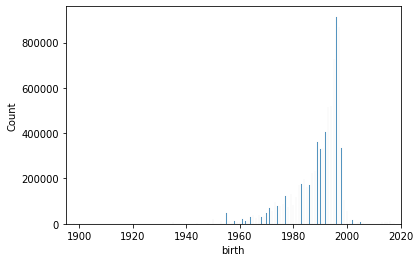

In [17]:
fig, ax = plt.subplots()
ax.set_xlim(1895.,2020.)
sns.histplot(df.birth.dropna(),ax=ax)

<AxesSubplot:xlabel='education', ylabel='Count'>

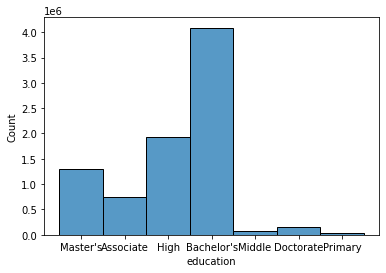

In [18]:
#plot education
sns.histplot(df.education.dropna())

<AxesSubplot:xlabel='category', ylabel='Count'>

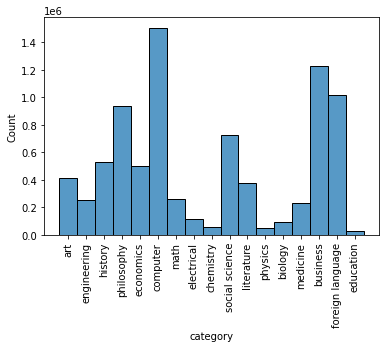

In [19]:
#plot category available
plt.xticks(rotation = 90)
sns.histplot(df.category)

In [20]:
# find the completed courses as per the category
t = df[df['truth'] == 0]

In [21]:
# find the dropout courses as per the category
t_1 = df[df['truth'] == 1]

<AxesSubplot:xlabel='category', ylabel='Count'>

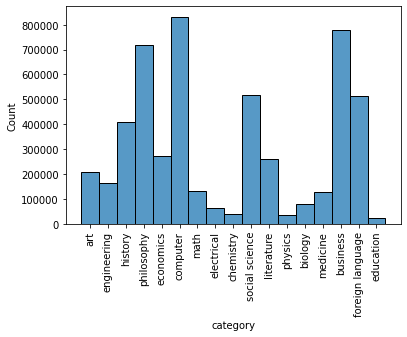

In [22]:
#plot category available for all completed courses
plt.xticks(rotation = 90)
sns.histplot(t.category)

<AxesSubplot:xlabel='category', ylabel='Count'>

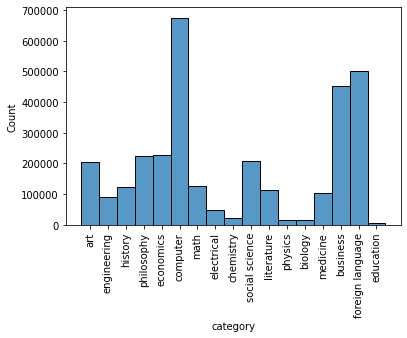

In [23]:
#plot category available for all dropped out courses
plt.xticks(rotation = 90)
sns.histplot(t_1.category)

<AxesSubplot:xlabel='gender', ylabel='Count'>

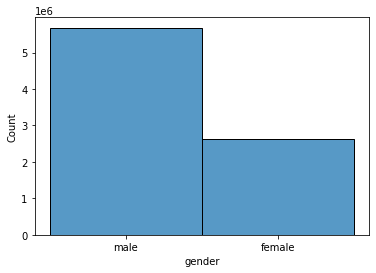

In [24]:
#plot gender who enrolled into course
sns.histplot(df.gender)

In [25]:
# percentage of completion wrt number of users enrolled for all courses
p_Completion_courses = len(t)/len(df)
p_Completion_courses


0.6204824604724679

In [26]:
# percentage of drouputs wrt number of users enrolled for all courses
p_dropout_courses = len(t_1)/len(df)
p_dropout_courses


0.3795175395275321

<AxesSubplot:xlabel='category', ylabel='Count'>

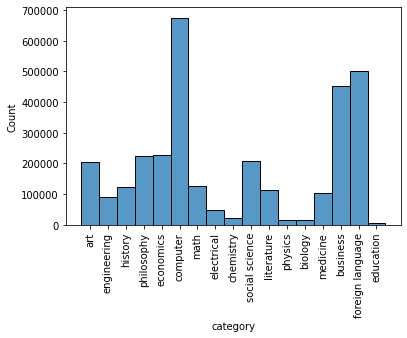

In [27]:
#plot category where there were dropouts
plt.xticks(rotation = 90)
sns.histplot(t_1.category)

In [28]:
df.dtypes

username        int64
session_id     object
action         object
time           object
truth           int64
id              int64
start          object
end            object
category       object
gender         object
education      object
birth         float64
dtype: object

In [29]:
df['Datetime'] = pd.to_datetime(df['time'])

In [30]:
df = df.drop(['time'], axis = 1)

In [31]:
## try to convert datetime to timestamp 
df['timestamp'] = df.Datetime.values.astype(np.int64) // 10 ** 9

In [32]:
df = df.drop(['Datetime'], axis = 1)

In [33]:
df = df.sort_values(['username','timestamp'])

In [34]:
df['timediff'] = pd.DataFrame(df.groupby('username').timestamp.diff().fillna(0))
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443614005,6.0


In [35]:
df.nunique()

username        14297
session_id      81687
action             22
truth               2
id                245
start             140
end               175
category           17
gender              2
education           7
birth              79
timestamp     5453013
timediff       115424
dtype: int64

In [36]:
# to see how much time each user spent including all action they did 
time_df = pd.DataFrame(df.groupby('username').sum()['timediff']).sort_values(by=['timediff'],ascending=False)

In [37]:
time_df

,timediff
username,
321214,62908012.0
20531,62576499.0
328771,62508383.0
12466,61495321.0
45200,61460239.0
...,...
364109,0.0
95108,0.0
66654,0.0


## Final Dataframe

In [38]:
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443614005,6.0


In [39]:
df.shape

(8322174, 13)

In [40]:
df.education.unique()

array(['Doctorate', "Bachelor's", "Master's", 'High', 'Associate',
       'Middle', 'Primary'], dtype=object)

# Pipeline for preprocessing

In [41]:
df.gender.value_counts()

male      5681900
female    2640274
Name: gender, dtype: int64

In [113]:
### ALL IMPORTS ----- LATER ADDING AT THE BEGINNING ###

# MACHINE LEARNING
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config; set_config(display='diagram')
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import joblib

In [114]:
df.head()

,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
865516,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613884,0.0
865517,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613889,5.0
865520,5,6ff66b03510e0dc515ea4637216f1ad3,close_courseware,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613995,106.0
865529,5,6ff66b03510e0dc515ea4637216f1ad3,load_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443613999,4.0
865535,5,6ff66b03510e0dc515ea4637216f1ad3,play_video,1,802,2015-09-29 08:00:00,2016-01-15 23:30:00,computer,male,Doctorate,1985.0,1443614005,6.0


In [115]:
X_train = df[['birth', 'timediff', 'action', 'category', 'gender', 'education']]

In [116]:
X_train.head()

,birth,timediff,action,category,gender,education
865516,1985.0,0.0,load_video,computer,male,Doctorate
865517,1985.0,5.0,load_video,computer,male,Doctorate
865520,1985.0,106.0,close_courseware,computer,male,Doctorate
865529,1985.0,4.0,load_video,computer,male,Doctorate
865535,1985.0,6.0,play_video,computer,male,Doctorate


In [117]:
y_train = df['truth']

In [118]:
X_train = X_train.iloc[:2_000]

In [119]:
X_train.head()

,birth,timediff,action,category,gender,education
865516,1985.0,0.0,load_video,computer,male,Doctorate
865517,1985.0,5.0,load_video,computer,male,Doctorate
865520,1985.0,106.0,close_courseware,computer,male,Doctorate
865529,1985.0,4.0,load_video,computer,male,Doctorate
865535,1985.0,6.0,play_video,computer,male,Doctorate


In [120]:
#X_train2 = df[['birth', 'timediff', 'action', 'category', 'gender', 'education']]

In [121]:
#X_train2.education.nunique()

In [136]:
X_train.action.unique()

array(['load_video', 'close_courseware', 'play_video', 'seek_video',
       'stop_video', 'pause_video', 'problem_get', 'click_info',
       'click_courseware', 'click_forum', 'click_about', 'problem_check',
       'problem_check_incorrect', 'problem_check_correct',
       'click_progress', 'reset_problem', 'problem_save'], dtype=object)

In [134]:
X_train.timediff.dtype

dtype('float64')

In [122]:
X_train = X_train2.iloc[:2_000]

In [124]:
# Impute then Scale for numerical variables: 
num_transformer = Pipeline([
    ('scaler', StandardScaler())])

# Encode categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Paralellize "num_transformer" and "One hot encoder"
preprocessor = ColumnTransformer([
    ('num_tr', num_transformer, ['birth']),
    ('cat_tr', cat_transformer, ['education', 'gender', 'category'])],
    remainder='drop')
    
preprocessor

ColumnTransformer(transformers=[('num_tr',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['birth']),
                                ('cat_tr',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['education', 'gender', 'category'])])

In [125]:
X_train_transformed = preprocessor.fit_transform(X_train)

display(X_train.head(3))
display(pd.DataFrame(X_train_transformed).head(3))

,birth,timediff,action,category,gender,education
865516,1985.0,0.0,load_video,computer,male,Doctorate
865517,1985.0,5.0,load_video,computer,male,Doctorate
865520,1985.0,106.0,close_courseware,computer,male,Doctorate


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.552281,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.552281,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.552281,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
X_train_transformed.shape

(2000, 20)

In [127]:
y_train = y_train.iloc[:2_000]

In [128]:
y_train.shape

(2000,)

In [129]:
pipe = make_pipeline(preprocessor, KNeighborsClassifier())
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_tr',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['birth']),
                                                 ('cat_tr',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['education', 'gender',
                                                   'category'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [67]:
#knn = KNeighborsClassifier(n_neighbors = 5)

In [131]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.8819999999999999

In [132]:
knn_model = pipe.fit(X_train, y_train)

In [133]:
filename = "KNN_BaseModel.joblib"
joblib.dump(knn_model, filename)

['KNN_BaseModel.joblib']

In [152]:
Test = X_train.iloc[1_000]
Test = pd.DataFrame(Test).T
Test

,birth,timediff,action,category,gender,education
26006720,1991.0,2.0,load_video,math,female,High


In [153]:
knn_model.predict(Test)

array([0])